In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/PPW/tugas

/content/drive/MyDrive/PPW/tugas


In [3]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [4]:
# Mengimpor modul yang diperlukan
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Ringkasan berita**

### Load Data

In [31]:
# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'

# Baca file CSV
df = pd.read_csv(file_path)

text = df['Isi Berita'][0]

In [32]:
print(text)

TIMESINDONESIA, JAKARTA – Di bawah kepemimpinan Presiden RI, Prabowo Subianto, Indonesia berpotensi akan bangkit sebagai "Macan Asia" yang disegani di panggung internasional. 
Hal itu dengan fokus pada kemandirian pangan dan energi, penguatan ekonomi, serta penegakan hukum yang tegas. Prabowo diharapkan mampu membawa Indonesia menuju era baru sebagai kekuatan regional yang tangguh dan berpengaruh.Advertisement
Demikian itu analisis dari Ketua Umum Poros Pemuda Indonesia (PPI), Muhlis Ali. ketika dimintai pendapatnya terkait prospek pemerintahan Prabowo, Rabu (4/9/2024) 
Menurut Muhlis, Indonesia tengah berada di ambang transformasi besar. Setelah dilantik sebagai Presiden Republik Indonesia pada 20 Oktober 2024, Prabowo Subianto diprediksi akan langsung tancap gas mewujudkan janji-janji kampanye yang dinanti rakyat Indonesia.
"Setelah 20 Oktober, Prabowo akan menjadi "media darling" dan simbol harapan rakyat. Namanya akan harum dan popularitasnya mengalami lonjakan luar biasa di awal p

### **Ekstraksi Kalimat**

In [33]:
# Ekstraksi kalimat
sentences = sent_tokenize(text)

# Membuat DataFrame dari kalimat
df_sentences = pd.DataFrame(sentences, columns=["Kalimat"])
df_sentences.head()

,Kalimat
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,Hal itu dengan fokus pada kemandirian pangan d...
2,Prabowo diharapkan mampu membawa Indonesia men...
3,ketika dimintai pendapatnya terkait prospek pe...
4,Setelah dilantik sebagai Presiden Republik Ind...


In [37]:
print("Jumlah Kalimat:", len(df_sentences), "kalimat")

Jumlah Kalimat: 53 kalimat


### Preprosesing

In [29]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_sentence(sentence):
    # Hanya menyisakan huruf dan titik, serta menghapus spasi yang berlebihan
    sentence_cleaned = re.sub(r'[^a-zA-Z\s.]', ' ', sentence).strip()  # Menghapus karakter selain huruf dan titik
    sentence_cleaned = re.sub(r'\s+', ' ', sentence_cleaned)  # Menghapus spasi lebih dari satu
    sentence_cleaned = sentence_cleaned.lower()  # Ubah ke huruf kecil

    # Tokenisasi
    words = word_tokenize(sentence_cleaned)  # Memecah teks menjadi kata-kata

    # Stemming setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menghapus stopwords
    words_without_stopwords = [word for word in stemmed_words if word not in stop_words]

    # Gabungkan kembali kata-kata menjadi satu kalimat
    final_sentence = ' '.join(words_without_stopwords)

    return final_sentence

In [38]:
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]
df_preprocessed = pd.DataFrame(preprocessed_sentences, columns=["kalimat_clean"])

df_preprocessed.head()

,kalimat_clean
0,timesindonesia jakarta pimpin presiden ri prab...
1,fokus mandiri pangan energi kuat ekonomi tega ...
2,prabowo harap bawa indonesia tuju era kuat reg...
3,kait prospek perintah prabowo rabu muhlis indo...
4,lantik presiden republik indonesia oktober pra...


### TF-IDF

In [12]:
# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_preprocessed['kalimat_clean'])

# Mengubah TF-IDF Matrix menjadi DataFrame untuk visualisasi
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df_preprocessed.index)

# Menampilkan beberapa baris hasil TF-IDF
print("TF-IDF Matrix:")
print(tfidf_df.head())

TF-IDF Matrix:
   acara  acu  adil  adu  advertisement  agenda  ajak  akses  aktif  \
0    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
1    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
2    0.0  0.0   0.0  0.0       0.270684     0.0   0.0    0.0    0.0   
3    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
4    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   

   akuntabel  ...  umkm  unggul  uni  upaya  usaha  utama  visi  waris  \
0        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
1        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
2        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
3        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
4        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   

   wibawa    wujud  
0     0.0  0.00000  
1     0.0  0.00000  
2     0.0  0.00000  
3     0.0  0.00000  
4     0.

In [13]:
tfidf_matrix.shape

(53, 310)

### Cosine Similarity

Cosine similarity adalah cara untuk mengukur seberapa mirip dua objek, biasanya dalam bentuk teks atau dokumen, dengan menggunakan sudut antara dua vektor. Vektor di sini bisa dianggap sebagai representasi dari teks, di mana setiap kata diwakili oleh angka (TF-IDF)

Cosine similarity menghasilkan nilai antara -1 dan 1:

  - 1 berarti kedua vektor sama persis.
  - 0 berarti tidak ada kesamaan (tegak lurus).
  - -1 berarti kedua vektor berlawanan arah.

Cosine similarity dihitung dengan menggunakan rumus berikut:

$$
\text{Cosine Similarity} = \frac{A \cdot B}{||A|| \cdot ||B||}
$$

Di mana:

 - $(A)$ dan $(B)$ adalah dua vektor yang akan dibandingkan.

 - ${A \cdot B}$ adalah hasil kali dot (dot product) dari kedua vektor, yang mengukur seberapa besar dua vektor tersebut saling berhubungan.

 - $|A|$ dan $|B|$ adalah norma (magnitude) dari vektor $(A)$ dan $(B)$, yang menunjukkan panjang masing-masing vektor.

In [14]:
# Menghitung Cosine Similarity antar kalimat
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mengubah matrix cosine similarity menjadi DataFrame untuk visualisasi
df_cosine_similarity = pd.DataFrame(cosine_sim_matrix)

# Menampilkan DataFrame cosine similarity
df_cosine_similarity

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.000000,0.050429,0.047167,0.176206,0.017372,0.000000,0.087573,0.020430,0.017495,...,0.000000,0.000000,0.031920,0.038692,0.021961,0.065492,0.053738,0.000000,0.021712,0.025508
1,0.000000,1.000000,0.049070,0.000000,0.000000,0.000000,0.000000,0.072216,0.000000,0.000000,...,0.060898,0.052426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.050429,0.049070,1.000000,0.096644,0.086662,0.113182,0.054700,0.083487,0.019005,0.016276,...,0.038404,0.000000,0.048945,0.059330,0.058326,0.121851,0.375558,0.087785,0.235729,0.047460
3,0.047167,0.000000,0.096644,1.000000,0.074781,0.024915,0.070585,0.058501,0.029300,0.025092,...,0.000000,0.000000,0.045779,0.055492,0.058423,0.093928,0.182961,0.000000,0.152789,0.036584
4,0.176206,0.000000,0.086662,0.074781,1.000000,0.173135,0.000000,0.015231,0.019651,0.016828,...,0.000000,0.000000,0.050607,0.061345,0.042247,0.125989,0.085199,0.000000,0.020884,0.049072
5,0.017372,0.000000,0.113182,0.024915,0.173135,1.000000,0.000000,0.023784,0.030685,0.026278,...,0.000000,0.000000,0.016861,0.020439,0.000000,0.000000,0.028386,0.000000,0.032611,0.000000
6,0.000000,0.000000,0.054700,0.070585,0.000000,0.000000,1.000000,0.027181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020449,0.000000,0.144057,0.000000,0.165497,0.000000
7,0.087573,0.072216,0.083487,0.058501,0.015231,0.023784,0.027181,1.000000,0.258440,0.132466,...,0.056518,0.000000,0.202665,0.191416,0.123622,0.000000,0.066651,0.000000,0.076571,0.000000
8,0.020430,0.000000,0.019005,0.029300,0.019651,0.030685,0.000000,0.258440,1.000000,0.190001,...,0.000000,0.092942,0.142431,0.246958,0.000000,0.000000,0.033382,0.000000,0.038351,0.000000
9,0.017495,0.000000,0.016276,0.025092,0.016828,0.026278,0.000000,0.132466,0.190001,1.000000,...,0.000000,0.000000,0.016981,0.020584,0.000000,0.000000,0.028587,0.000000,0.032842,0.000000


### Matrix Adjacency

Matriks adjacency adalah representasi matematis yang digunakan untuk menggambarkan hubungan antara simpul (nodes) dalam sebuah graf. Dalam konteks graf, simpul dapat merepresentasikan objek (seperti titik, orang, atau dokumen), dan tepi (edges) menggambarkan hubungan atau koneksi antara objek tersebut.

In [15]:
# Menentukan threshold untuk adjacency matrix
threshold = 0.2

# Membentuk adjacency matrix berdasarkan cosine similarity dan threshold
adj_matrix = (cosine_sim_matrix > threshold).astype(int)

# Mengisi diagonal dengan 0 agar tidak ada self-loop
np.fill_diagonal(adj_matrix, 0)

# Mengubah adjacency matrix menjadi DataFrame untuk visualisasi
df_adjacency_matrix = pd.DataFrame(adj_matrix)

# Menampilkan DataFrame adjacency matrix
df_adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Graph

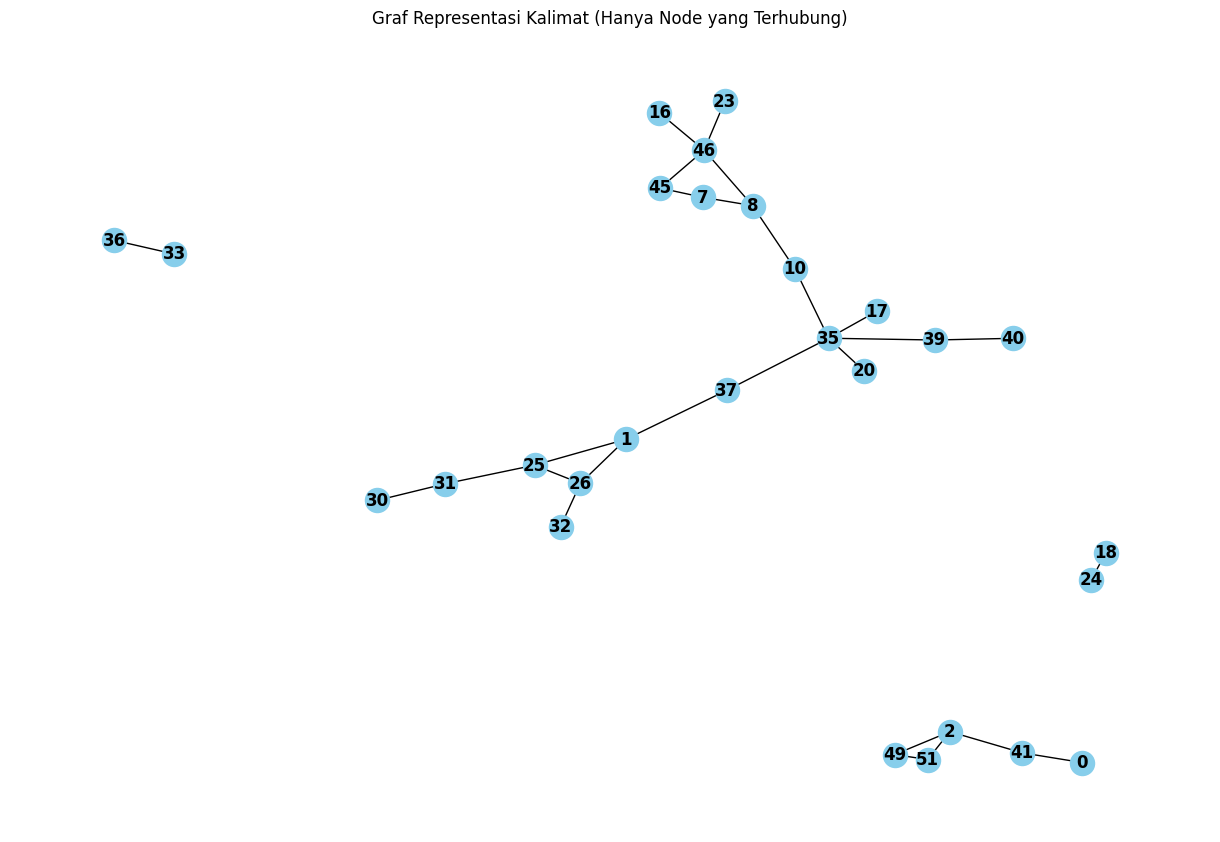

In [24]:
# Convert the dataframe into a numpy matrix
adj_matrix = df_adjacency_matrix.to_numpy()

# Create the graph from the adjacency matrix
graph = nx.from_numpy_array(adj_matrix)

# Remove nodes with no edges (degree 0 nodes)
graph.remove_nodes_from(list(nx.isolates(graph)))

# Define the layout for the graph
pos = nx.spring_layout(graph)

# Draw the graph, displaying only connected nodes
plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=300)

# Add a title
plt.title("Graf Representasi Kalimat (Hanya Node yang Terhubung)")

# Show the graph
plt.show()

### Centrality

Centrality adalah konsep dalam teori graf yang digunakan untuk mengukur pentingnya atau pengaruh suatu simpul (node) dalam sebuah graf. dalam code ini, digunakan salah satu jenis dari Centrality yaitu :

**Betweenness Centrality**, Mengukur seberapa sering suatu simpul muncul dalam jalur terpendek antara dua simpul lain.

In [44]:
# Menghitung centrality
degree_centrality = nx.degree_centrality(graph)

# Mengubah centrality menjadi DataFrame untuk ditampilkan
centrality_df = pd.DataFrame({
    'degree Centrality': degree_centrality
})

centrality_df

,degree Centrality
0,0.037037
1,0.111111
2,0.111111
7,0.074074
8,0.111111
10,0.074074
16,0.037037
17,0.037037
18,0.037037
20,0.037037


### Rangkuman kalimat

In [45]:
# Menentukan jumlah kalimat yang akan disertakan dalam rangkuman (misalnya top 3 kalimat)
top_n = 3

# Mengurutkan kalimat berdasarkan nilai degree Centrality
ranked_sentences_degree = sorted(((score, idx) for idx, score in degree_centrality.items()), reverse=True)

# Membuat rangkuman berdasarkan top_n kalimat dengan centrality tertinggi
summary_degree = [sentences[idx] for _, idx in ranked_sentences_degree[:top_n]]

In [46]:
# Menampilkan hasil rangkuman untuk centrality
print("Rangkuman berdasarkan degree Centrality:")
for i, sent in enumerate(summary_degree, 1):
    print(f"{i}. {sent}")

Rangkuman berdasarkan degree Centrality:
1. "Prabowo harus bisa menjaga integritas pemerintahannya agar tetap bersih dan bebas dari korupsi," kata Muhlis.
2. Bagi Prabowo, demokrasi tidak harus ala Barat, tapi demokrasi Indonesia punya ciri khas sendiri yang disebut Demokrasi Pancasila.
3. Pernyataan Prabowo yang menyebut Indonesia tidak perlu takut negara manapun jika berhasil berdaulat di bidang pangan dan energi, menurut Muhlis, adalah bukti komitmen Prabowo untuk memperkuat kedaulatan ekonomi nasional.
